## ARIMA 모델을 이용한 유튜버 씨디맨 성장률 예측

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## 유튜버 정보 csv에서 읽어오기

In [2]:
df = pd.read_csv('data/씨디맨_stat.csv',index_col = 'searchDate')

In [3]:
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2020-02-14,23951,79700,4378,0,51
2020-02-15,24636,79700,4380,0,51
2020-02-16,25744,79800,4380,0,52
2020-02-17,26328,79800,4381,0,52
2020-02-18,25206,79800,4381,0,51
...,...,...,...,...,...
2021-02-12,21047,88400,4531,90,15
2021-02-13,22022,88400,4532,90,15
2021-02-14,21307,88400,4532,90,15


## 컬럼 정리 (구독자 수만 남겨놓기)

In [4]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [5]:
df

,subscriberCount
searchDate,
2020-02-14,79700
2020-02-15,79700
2020-02-16,79800
2020-02-17,79800
2020-02-18,79800
...,...
2021-02-12,88400
2021-02-13,88400
2021-02-14,88400


## 30일 예측하기 위해서 마지막 한달 데이터 test로 분리

In [6]:
df_size = len(df)
pred_date = 30 # 30일 예측
target_date = df_size - pred_date

In [7]:
train_df = df[:target_date]

In [8]:
test_df = df[target_date:]

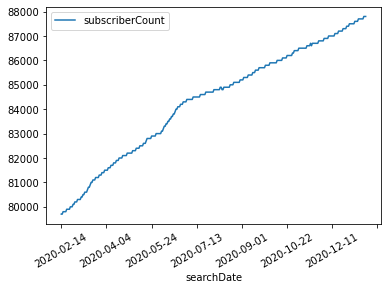

In [9]:
train_df.plot()
plt.xticks(rotation=30)
plt.show()

## ARIMA 모델 설계 및 학습

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [11]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  337
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1724.838
Method:                       css-mle   S.D. of innovations             40.378
Date:                Tue, 16 Feb 2021   AIC                           3461.676
Time:                        15:50:19   BIC                           3484.596
Sample:                             1   HQIC                          3470.811
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9662      3.092      7.752      0.000      17.907      30.026
ar.L1.D.y      1.2130      0.099     12.270      0.000       1.019       1.407
ar.L2.D.y     -0.2796      0.096     -2.924      0.0

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## 최종 30일 예측값 시각화

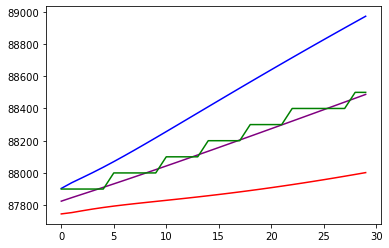

In [12]:
# 학습 데이터셋으로부터 30일 뒤를 예측합니다.
forecast_data = model_fit.forecast(steps=30) 

pred_y = forecast_data[0].tolist() # 마지막 30일의 예측 데이터입니다. 
test_y = test_df.subscriberCount.values # 실제 30일 가격 데이터입니다. 
pred_y_lower = [] # 마지막 30일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 30일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

#plt.ylim([78000,88000])
plt.plot(pred_y, color="purple") # 모델이 예상한 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [13]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_y, pred_y))

33.80513875333272


In [14]:
forecast_data[0]

array([87824.79286081, 87846.68603204, 87867.90651711, 87889.12190624,
       87910.51922233, 87932.138638  , 87953.97658343, 87976.01749468,
       87998.24349122, 88020.63723648, 88043.18270154, 88065.86529155,
       88088.67178544, 88111.59022753, 88134.60981288, 88157.72077854,
       88180.91430362, 88204.18241865, 88227.51792342, 88250.91431275,
       88274.36570941, 88297.86680351, 88321.4127977 , 88344.99935775,
       88368.62256781, 88392.27889002, 88415.96512804, 88439.67839408,
       88463.4160791 , 88487.17582592])

## 발표날까지 예측

In [15]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(df.subscriberCount.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  367
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1876.187
Method:                       css-mle   S.D. of innovations             40.140
Date:                Tue, 16 Feb 2021   AIC                           3764.375
Time:                        15:50:20   BIC                           3787.807
Sample:                             1   HQIC                          3773.685
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8817      2.826      8.451      0.000      18.343      29.421
ar.L1.D.y      1.2101      0.092     13.125      0.000       1.029       1.391
ar.L2.D.y     -0.2789      0.089     -3.132      0.0

C:\Users\vdi02\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


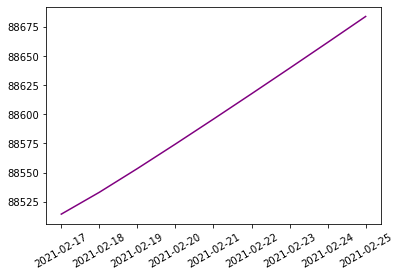

In [16]:
# 2021/02/16 데이터셋으로부터 발표날까지 9일 예측
forecast_data = model_fit.forecast(steps=9) 

pred_y = forecast_data[0].tolist() #예측 데이터입니다.

#plt.ylim([78000,88000])
plt.xticks([0,1,2,3,4,5,6,7,8], 
           ['2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20', 
            '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25'])
plt.xticks(rotation=30)
plt.plot(pred_y, color="purple") # 모델이 예상한 구독자 수 그래프입니다.

In [17]:
forecast_data[0].astype(int)

array([88514, 88533, 88553, 88574, 88595, 88617, 88639, 88661, 88683])